In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here, we import the libraries needed to carry out data cleaning and preprocessing. The numpy library will be used for numerical operations. The pandas library (pd.read_) is used to access the train_data dataset that we will be using for our analysis and model training and testing. matplotlib.pyplot and seaborn are used for our data visualization.  

In [2]:
train_data = pd.read_csv("Downloads/Train_data.csv")

train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
train_data.info() 

#Here we want to have a breakdown of what our dataset is made up of.
#the number of rows and and the columns that makes up our dataset.
#the variable type of our dataset; string, object, float and integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [4]:
train_data.duplicated().sum()

#here we are checking for the total of duplicated values.

np.int64(0)

In [5]:
train_data.isnull().sum()

#here we are checking for the sum of null values we have in each  column.

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [6]:
train_data = train_data.fillna(0)

#inorder to make our dataset ready for analysis, we fill the null values with zero.

In [7]:
train_data.isnull().sum()

#after we have filled out the null value with zero. 
#we check again to confirm the new null sum value.

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [8]:
num_cols = [col for col in train_data. columns if train_data[col].dtypes != "object"]

cat_cols = [col for col in train_data. columns if train_data[col].dtypes == "object"]

print("Categorical:", cat_cols)

print("Numerical:", num_cols)

#here, we use the for loop function to give us a list of the num_cols and the cat_cols.

Categorical: ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']
Numerical: ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim']


In [9]:
train_data.describe()

#the (.describe) function is used to give us the statistical distribution of the numerical columns in the dataset.

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1855.839944,2.186034,1825.078771,0.228212
std,1.383769,0.239756,0.460629,2272.645786,0.940632,505.583685,0.419709
min,2012.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2012.000000,0.997268,0.000000,500.000000,2.000000,1956.750000,0.000000
50%,2013.000000,1.000000,0.000000,1050.000000,2.000000,1960.000000,0.000000
75%,2015.000000,1.000000,1.000000,2250.000000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


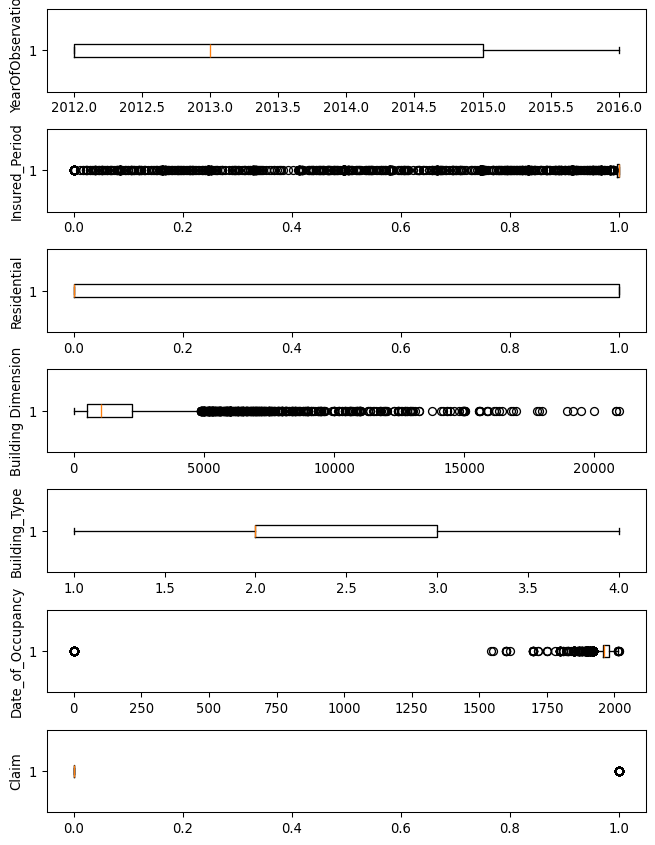

In [10]:
num_cols = train_data.select_dtypes(include="number").columns

fig, axs = plt.subplots(len(num_cols), 1, figsize=(7, 9), dpi=95)

for i, col in enumerate(num_cols):
    axs[i].boxplot(train_data[col], vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

#here, we use the (.boxplot) to check and visually see the outliers in our numerical columns.

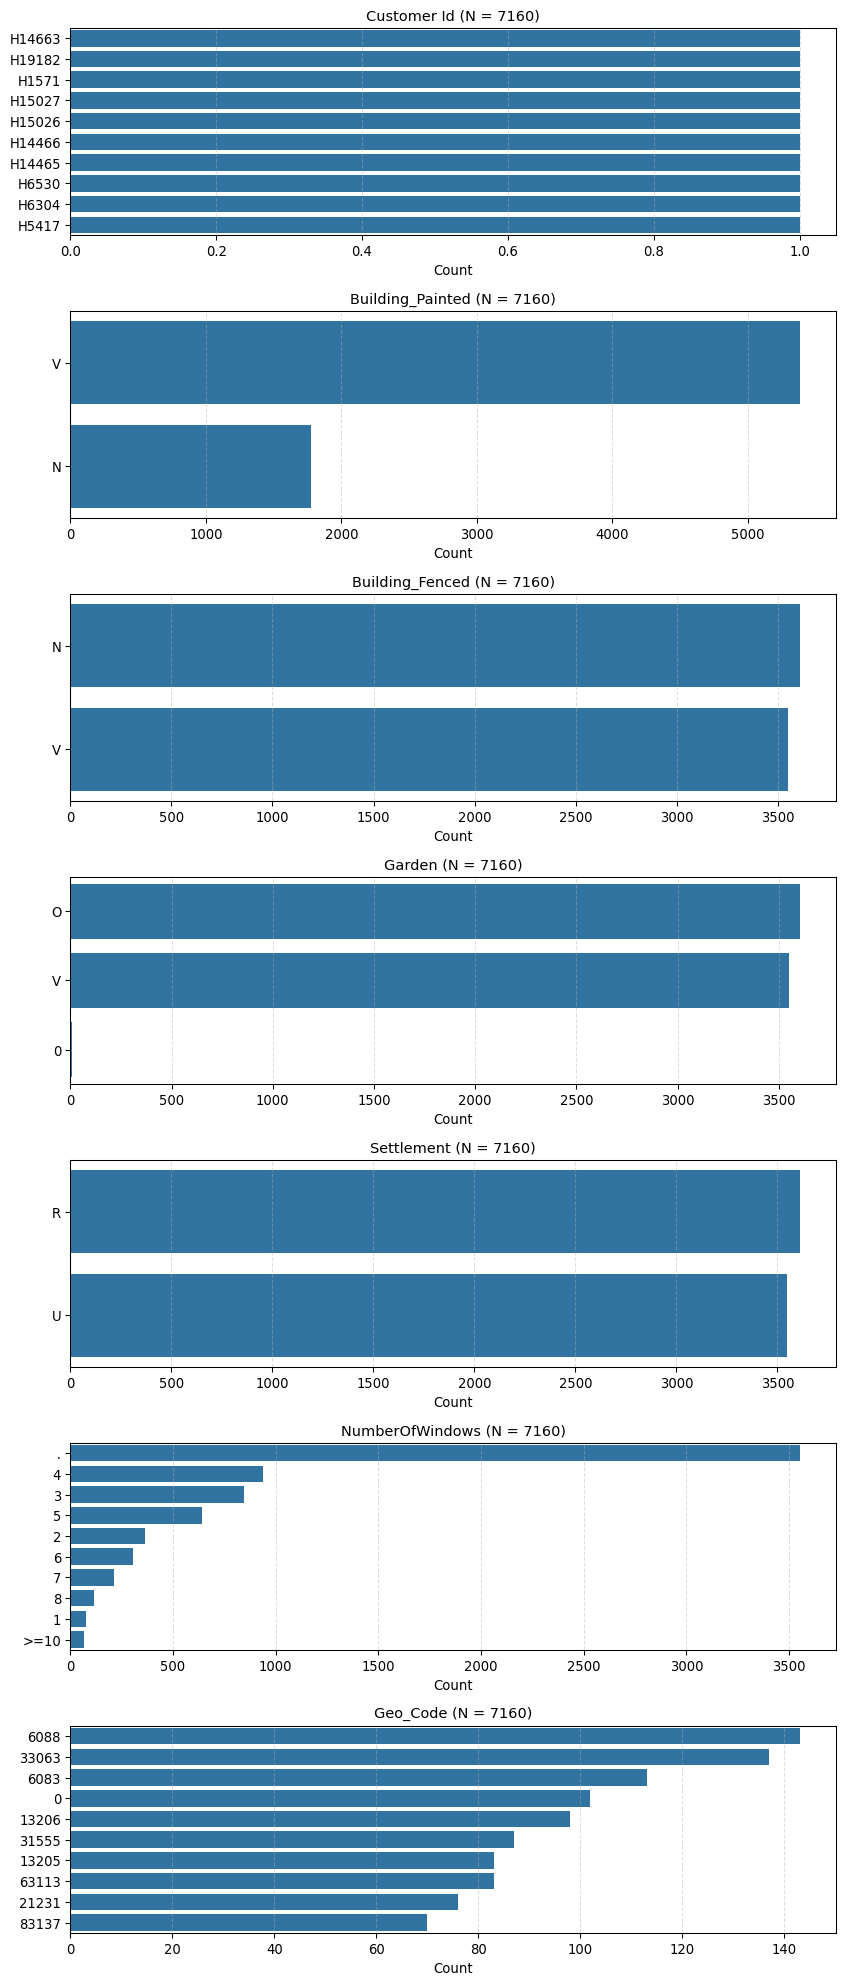

In [11]:
cat_cols = train_data.select_dtypes(exclude="number").columns

fig, axs = plt.subplots(
    len(cat_cols), 1,
    figsize=(9, 3 * len(cat_cols)),
    dpi=95
)

if len(cat_cols) == 1:
    axs = [axs]

for i, col in enumerate(cat_cols):
    counts = train_data[col].value_counts().head(10)
    n = train_data[col].notna().sum()

    sns.barplot(
        x=counts.values,
        y=counts.index,
        ax=axs[i]
    )

    axs[i].set_title(f"{col} (N = {n})", fontsize=11)
    axs[i].set_xlabel("Count")
    axs[i].set_ylabel("")
    axs[i].grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

#here, we used the (.barplot) function to visually see the value distribution in our categorical column.

In [12]:
outlier_summary = {}

for col in num_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = ((train_data[col] < lower) | (train_data[col] > upper)).sum()
    outlier_summary[col] = outliers

outlier_summary

{'YearOfObservation': np.int64(0),
 'Insured_Period': np.int64(1237),
 'Residential': np.int64(0),
 'Building Dimension': np.int64(558),
 'Building_Type': np.int64(0),
 'Date_of_Occupancy': np.int64(1220),
 'Claim': np.int64(1634)}

In [13]:
train_data[num_cols].corr()

#the (.corr) function is used to check the relationship each numerical columns have with one another.

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1.000000,0.025434,-0.040391,0.013462,0.005490,0.041635,-0.016367
Insured_Period,0.025434,1.000000,-0.037620,0.010740,-0.017811,0.182660,0.088715
Residential,-0.040391,-0.037620,1.000000,0.055312,0.334039,-0.081503,0.063509
Building Dimension,0.013462,0.010740,0.055312,1.000000,0.010896,0.089619,0.295165
Building_Type,0.005490,-0.017811,0.334039,0.010896,1.000000,-0.086077,0.112168
Date_of_Occupancy,0.041635,0.182660,-0.081503,0.089619,-0.086077,1.000000,0.019288
Claim,-0.016367,0.088715,0.063509,0.295165,0.112168,0.019288,1.000000


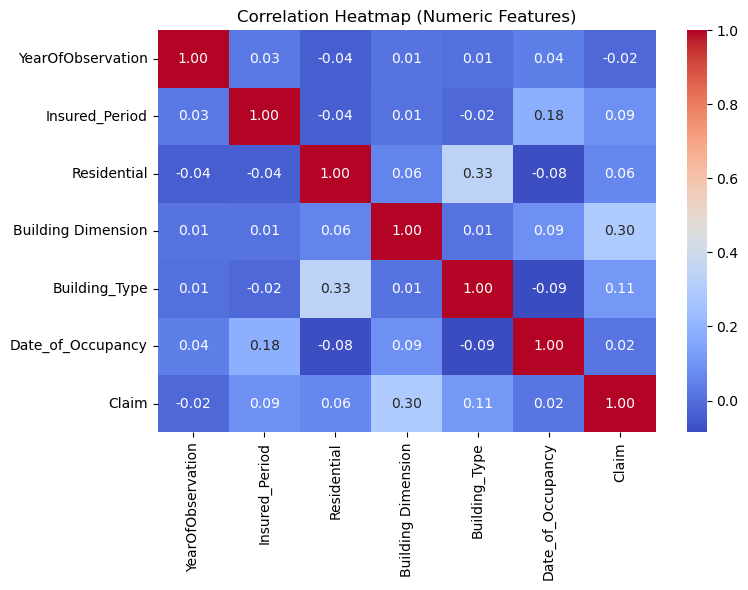

In [14]:
num_cols = (
    train_data
    .select_dtypes(include="number")
   
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    num_cols.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

#the (.heatmap) function is used to visually see the relationship between each numerical columns.

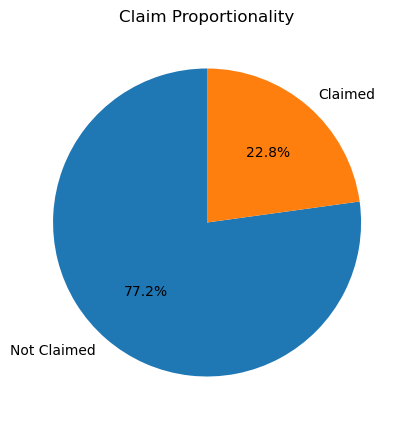

In [15]:
counts = train_data["Claim"].value_counts().sort_index()

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=["Not Claimed", "Claimed"],
    autopct="%.1f%%",
    shadow=False,
    startangle=90
)
plt.title("Claim Proportionality")
plt.show()

#the (.pie) function is used to check the values proportionality in the target variable

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#here we are importing the libraries will be using in our model building.

In [17]:
X = train_data.drop("Claim", axis =1)

y = train_data['Claim']

#here, we drop our target from our features.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

#here, we split our data into the train and test split. our test_size being twenty percent.

In [19]:
X.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [21]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7160 entries, 0 to 7159
Series name: Claim
Non-Null Count  Dtype
--------------  -----
7160 non-null   int64
dtypes: int64(1)
memory usage: 56.1 KB


In [22]:
X.shape

(7160, 13)

In [23]:
y.shape

(7160,)

In [66]:
cat_cols = X_train.select_dtypes(include="object").columns


In [67]:
for train_data_ in [X_train, X_test]:
    train_data_[cat_cols] = train_data_[cat_cols].astype(str)

#here, inorder for us to properly encode our categorical variabl.
#we tranformed them to uniformally become all strings and not strings and integers 


In [68]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols]  = encoder.transform(X_test[cat_cols])

#here, we encodes our categorical variables, trannsforming them into integers.
#this is to make our dataset model training and testing worthy.

In [69]:
print(X_train[cat_cols].head(10))
print(X_train[cat_cols].dtypes)


      Customer Id  Building_Painted  Building_Fenced  Garden  Settlement  \
5266        342.0               0.0              1.0     2.0         1.0   
5441        135.0               0.0              1.0     2.0         1.0   
7025       2915.0               1.0              0.0     1.0         0.0   
7130       2710.0               1.0              1.0     2.0         1.0   
4454       2578.0               1.0              0.0     1.0         0.0   
6792       2808.0               1.0              0.0     1.0         0.0   
1101       2151.0               1.0              0.0     1.0         0.0   
2865       3536.0               1.0              0.0     1.0         0.0   
1499       5249.0               0.0              1.0     2.0         1.0   
6358        304.0               0.0              1.0     2.0         1.0   

      NumberOfWindows  Geo_Code  
5266              0.0     848.0  
5441              0.0     897.0  
7025              6.0     189.0  
7130              0.0      

In [70]:
X_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
5266,342.0,2016,0.997268,1,0.0,1.0,2.0,1.0,850.0,4,1960.0,0.0,848.0
5441,135.0,2015,1.000000,0,0.0,1.0,2.0,1.0,2135.0,2,1960.0,0.0,897.0
7025,2915.0,2013,1.000000,0,1.0,0.0,1.0,0.0,2700.0,3,1970.0,6.0,189.0
7130,2710.0,2014,1.000000,1,1.0,1.0,2.0,1.0,0.0,1,1700.0,0.0,0.0
4454,2578.0,2013,1.000000,0,1.0,0.0,1.0,0.0,1080.0,2,1960.0,5.0,693.0


In [71]:
X_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
5266,342.0,2016,0.997268,1,0.0,1.0,2.0,1.0,850.0,4,1960.0,0.0,848.0
5441,135.0,2015,1.000000,0,0.0,1.0,2.0,1.0,2135.0,2,1960.0,0.0,897.0
7025,2915.0,2013,1.000000,0,1.0,0.0,1.0,0.0,2700.0,3,1970.0,6.0,189.0
7130,2710.0,2014,1.000000,1,1.0,1.0,2.0,1.0,0.0,1,1700.0,0.0,0.0
4454,2578.0,2013,1.000000,0,1.0,0.0,1.0,0.0,1080.0,2,1960.0,5.0,693.0


In [72]:
X_train.shape

(5728, 13)

In [73]:
X_test.shape

(1432, 13)

In [74]:
y_train.shape

(5728,)

In [75]:
y_test.shape

(1432,)

In [76]:
model = RandomForestClassifier(
    n_estimators=600,
    max_depth=7,
    min_samples_leaf=10,
    min_samples_split=20,
    max_features="sqrt",
    class_weight={0:1, 1:2.5},
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

#here, we are calling our model; randomforestclassifier. 
#and fitting it into our train and test split.

RandomForestClassifier(class_weight={0: 1, 1: 2.5}, max_depth=7,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=600, n_jobs=-1, random_state=42)

In [77]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1098
           1       0.49      0.45      0.47       334

    accuracy                           0.76      1432
   macro avg       0.66      0.65      0.66      1432
weighted avg       0.76      0.76      0.76      1432

Accuracy: 76.26%
[[942 156]
 [184 150]]


The precision score shows that our model predicts 0.49 true positives, which means that there are about 0.41 false positives. The recall score being at 0.45 tells us that our model identifies 0.55 true positives. The f1-score 0.47 is the mean of both the precision and recall. This means that our model still needs to be improved upon.

In [108]:
# Use your trained Decision Tree (model)
y_probs = model.predict_proba(X_test)[:, 1]  # probability of positive class


In [109]:
from sklearn.metrics import roc_auc_score


In [110]:
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC score:", roc_auc)

##here, we want see how our model can separate positives from negatives.

ROC-AUC score: 0.7192568415082403


In [99]:
#Here we are implementing the decision tree classifier model.  

from sklearn.tree import DecisionTreeClassifier

In [100]:
model_2 = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=12,
    min_samples_split=20,
    class_weight={0:1, 1:2.5},
    random_state=42
)

model_2.fit(X_train, y_train)

#here, we are calling and testing a new model; decisiontreeclassifier. 
#and fitting it into our train and test split to see if our dataset performs better.

DecisionTreeClassifier(class_weight={0: 1, 1: 2.5}, max_depth=6,
                       min_samples_leaf=12, min_samples_split=20,
                       random_state=42)

In [101]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1098
           1       0.44      0.50      0.47       334

    accuracy                           0.73      1432
   macro avg       0.64      0.65      0.64      1432
weighted avg       0.75      0.73      0.74      1432

Accuracy: 73.46%
[[886 212]
 [168 166]]


The precision score shows that our model predicts 0.44 true positives, which means that there are about 0.56 false positives. The recall score being at 0.50 tells us that our model identifies 0.50 true positives. The f1-score 0.47 is the mean of both the precision and recall.

In [105]:
# Use your trained Decision Tree (model_2)
y_probs = model_2.predict_proba(X_test)[:, 1]  # probability of positive class


In [106]:
from sklearn.metrics import roc_auc_score

In [107]:
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC score:", roc_auc)

#here, we want see how our model can separate positives from negatives.

ROC-AUC score: 0.6978801958923682
